#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Load Dataset

In [2]:
# Read CSV
import pandas as pd
import numpy as np
dataa = "https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv"
df = pd.read_csv(url)
df.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [5]:
import pandas as pd
is_duplicate = df.duplicated()
if is_duplicate.any():
    print(True)
else:
    print(False)

True


Periksa apakah ada missing values

In [12]:
df.isna().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

Periksa outlier dengan boxplot untuk setiap kolom feature

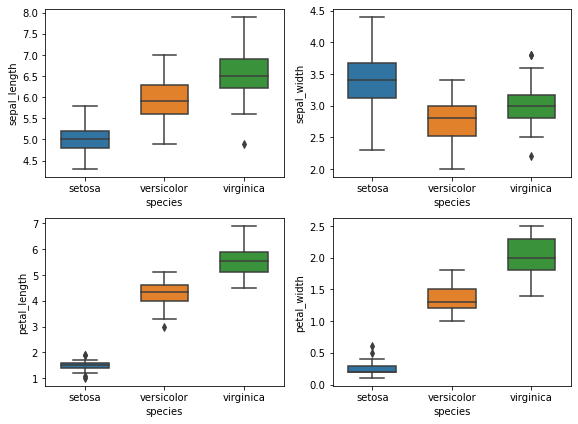

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6), sharex=False)

sns.boxplot(data=df, x="species", y='sepal_length', width=0.6, ax=axes[0, 0])
sns.boxplot(data=df, x="species", y='sepal_width', width=0.6, ax=axes[0, 1])
sns.boxplot(data=df, x="species", y='petal_length', width=0.6, ax=axes[1, 0])
sns.boxplot(data=df, x="species", y='petal_width', width=0.6, ax=axes[1, 1])
 
fig.tight_layout()

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [34]:
X = df.drop("species", axis=1)
y = df["species"]
print("variabel independen (X):", X.shape)
print("variabel dependen (y):", y.shape)

variabel independen (X): (150, 4)
variabel dependen (y): (150,)


Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
print ('dataset train:', X_train.shape,  y_train.shape)
print ('test dataset:', X_test.shape,  y_test.shape)

dataset train: (135, 4) (135,)
test dataset: (15, 4) (15,)


Lakukan fitur scaling pada variabel X_train dan X_test. 

In [66]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi objek scaler
scaler = StandardScaler()

# Terapkan scaling pada X_train
X_train_scaled = scaler.fit_transform(X_train)

# Terapkan scaling yang sama pada X_test
X_test_scaled = scaler.transform(X_test)


#Logistic Regression

Bangun model dan ukur accuracy nya

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Prediction Accuracy:", accuracy)

Prediction Accuracy: 1.0


In [68]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(y_pred)

['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor']


Uji model dengan dataset test

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(y_pred)

['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor']


In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics
import numpy

lr.fit(X_train, y_train)
confi = confusion_matrix(y_test, y_pred)
print(confi)
print(f"Accuracy Score: {accuracy:.4f}")

[[3 0 0]
 [0 8 0]
 [0 0 4]]
Accuracy Score: 1.0000


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [85]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

Uji hasil model dengan data test

In [96]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(y_pred)


['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'virginica' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'setosa']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [103]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
confim = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion Matrix:")
print(confim)
print("Accuracy Score:", accuracy)


Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Accuracy Score: 0.9777777777777777


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [106]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(metric='euclidean')
print(classifier)

KNeighborsClassifier(metric='euclidean')


Uji model dengan data test

In [111]:
print(classifier.predict(X_test))

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'setosa']


Ukur akurasi dari model K-Nearest Neighbor

In [117]:

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("Accuracy Score:", accuracy)



Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Accuracy Score: 1.0


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah...

In [ ]:
Berdasarkan dari 3 model yang telah digunakan untuk menghasilkan klasifisikasi dengan akurasi tertinggi yang saya dapatkan adalah hasil tertinggi adalah dari penerapan model K-NN dan logistic regression hasil dari akurasi ini adalah 1.0 